In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


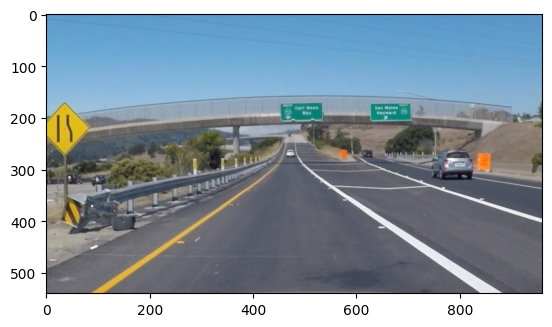

In [55]:
image_name = "exit-ramp.jpg"
image = mpimg.imread(image_name)
plt.imshow(image)

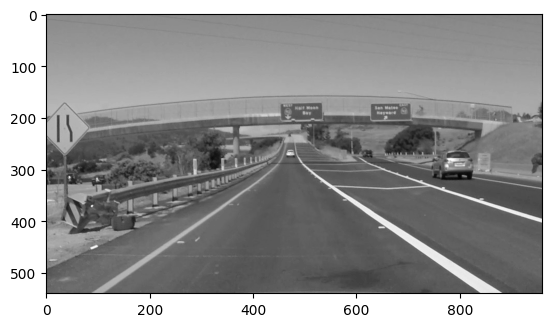

In [56]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

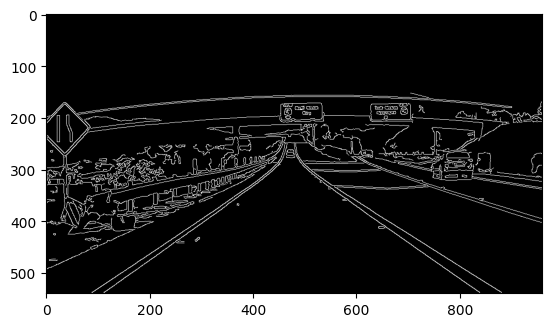

In [58]:
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges, cmap="gray")

(540, 960)


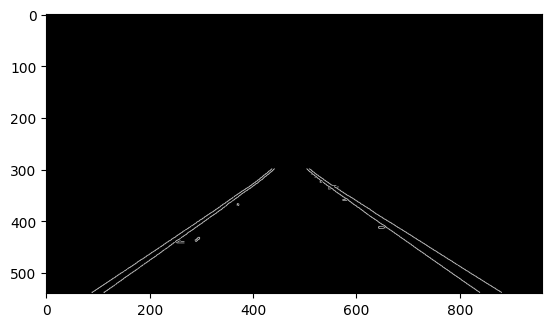

In [129]:
mask = np.zeros_like(edges)
ignore_mask_color = 255
imshape = edges.shape
print(imshape)
vertices = np.array([[(430,300),(80,imshape[0]), (890, imshape[0]), (510, 300)]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges, cmap="gray")



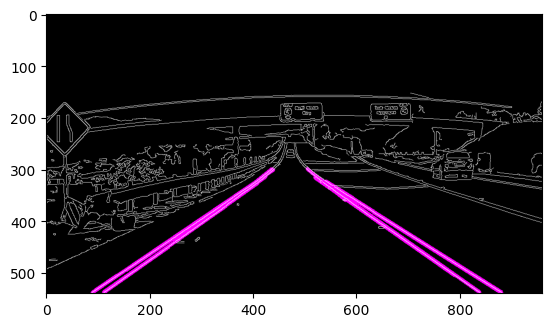

In [157]:
rho = 1
theta = np.pi/180
threshold = 15
min_line_length = 40
max_line_gap = 20
line_image = np.copy(image)*0

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), (255,0,255), 5)
color_edges = np.dstack((edges,edges,edges))

lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
plt.imshow(lines_edges)